In [35]:
import handcalcs.render
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

In [36]:
L_O=-45       #Longitude Hora Legal
L =-46.6388  #Longitude 
L_a= -23.5489  #Latitude
Beta=0           #Inclinação 
GSC=1.367         #Constante solar  KW/m^2

In [37]:
df=pd.read_csv("Dados Segundo exercicio.csv" , encoding ='UTF-8' , sep=";")



NUMERO DO DIA NO ANO

In [38]:
df['n']= df['Dia']  + (df['Mês'] -1)*30 +df['Cor']


CALCULO DA HORA SOLAR 

In [39]:
df['B']= (360/364)*(df['n']-81)

In [40]:
df['E']= 9.87*np.sin(np.radians(2*df['B']))-7.53*np.cos(np.radians(df['B']))-1.5*np.sin(np.radians(df['B']))

In [41]:
df['Corhora']= (4*(L_O-L)+df['E'])/60

In [42]:
HL=14.50


In [43]:
df['HS']= HL+df['Corhora']


ÂNGULO HORARIO

In [44]:
df['Omega']= (df['HS']-12)*15

DECLINAÇÃO SOLAR 

In [45]:
df['sigma']= 23.45*np.sin(np.radians(360/365*(284+df['n'])))

ÂNGULO ZENITAL 

In [46]:
df['teta_z']= np.degrees(np.arccos(np.sin(np.radians(df['sigma']))*(np.sin(np.radians(L_a))+np.cos(np.radians(df['sigma']))*np.cos(np.radians(L_a))*np.cos(np.radians(df['Omega'])))))



ÂNGULO DE INCIDENCIA 

In [47]:
df['teta']=np.degrees(np.arccos(np.cos(np.radians(L_a+Beta)*np.cos(np.radians(df['sigma']))*np.cos(np.radians(df['Omega']))+np.sin(np.radians(L_a+Beta))*np.sin(np.radians(df['sigma'])))))


IRRADIAÇÃO EXTRATERRESTE SOBRE UMA SUPERFICIE HORIZONTAL EM UM PONTO DA TERRA

In [48]:
df['GO']=GSC*(1+0.033*np.cos(np.radians((360*df['n'])/365)))*np.cos(np.radians(df['teta_z']))


ÂNGULO HORÁRIO DO PÔR DO SOL 

In [49]:
df['omega_s']=np.degrees(np.arccos((-np.tan(np.radians(L_a))*np.tan(np.radians(df['sigma'])))))


IRRADIAÇÃO EXTRATERRESTRE INTEGRADA HORARI SOBRE SUPERFICIE HORIZONTAL 

In [50]:
df['HO']=((2.75*10**4)*GSC*((1+0.033*np.cos(np.radians((360*df['n'])/365))))*(((1.75*10**-2)*df['omega_s']*np.sin(np.radians(df['sigma']))*np.sin(np.radians(L_a))+np.cos(np.radians(df['sigma']))*np.cos(np.radians(L_a))*np.sin(np.radians(df['omega_s'])))))/1000


In [51]:
df['H']=pd.read_csv("Irradiação integrada diaria.csv" , encoding ='UTF-8' , sep=";")


In [52]:
df['KT']=df['H']/df['HO']


In [53]:
df['Hd/H']=0.775+0.0065*(df['omega_s']-90)-(0.505+0.00455*(df['omega_s']-90))*np.cos(np.radians(115*df['KT']-103))


In [54]:
df['Hd']=df['Hd/H']*df['H']


In [91]:
df['Hb']=df['H']-df['Hd']
df

,Dia,Cor,Mês,n,B,E,Corhora,HS,Omega,sigma,...,Hb,omega_s*,Rb,R,HT,HTb,Htd,Htr,HTd,HTr
0,15,0,1,15,-65.274725,-9.286743,-0.045526,14.454474,36.817114,-21.269474,...,9.374728,93.354664,0.921001,0.955459,17.954994,8.634132,9.256829,0.064032,9.256829,0.064032
1,15,1,2,46,-34.615385,-14.573582,-0.133640,14.366360,35.495405,-13.289156,...,10.921124,92.034712,0.976495,0.982790,19.388482,10.664428,8.656833,0.067222,8.656833,0.067222
2,15,-1,3,74,-6.923077,-9.656338,-0.051686,14.448314,36.724715,-2.818879,...,9.356419,90.424090,1.055476,1.026469,17.367851,9.875478,7.434720,0.057654,7.434720,0.057654
3,15,0,4,105,23.736264,-0.223084,0.105535,14.605535,39.083029,9.414893,...,8.802878,88.571694,1.166157,1.094572,16.313503,10.265543,5.997176,0.050784,5.997176,0.050784
4,15,0,5,135,53.406593,3.754880,0.171835,14.671835,40.077520,18.791918,...,7.447622,87.068002,1.276835,1.164135,14.332836,9.509380,4.781503,0.041952,4.781503,0.041952
5,15,1,6,166,84.065934,-0.240580,0.105244,14.605244,39.078655,23.314410,...,7.131943,86.285525,1.343958,1.211974,13.831051,9.585028,4.207137,0.038885,4.207137,0.038885
6,15,1,7,196,113.736264,-5.615811,0.015656,14.515656,37.734847,21.517336,...,7.173732,86.602283,1.315894,1.191133,13.893380,9.439869,4.413767,0.039744,4.413767,0.039744
7,15,2,8,227,144.395604,-4.094882,0.041005,14.541005,38.115080,13.783564,...,9.536779,87.886607,1.213895,1.132415,17.076816,11.576652,5.448781,0.051384,5.448781,0.051384
8,15,3,9,258,175.054945,5.677410,0.203877,14.703877,40.558152,2.216887,...,8.293877,89.666581,1.097822,1.049375,15.866546,9.105200,6.709825,0.051520,6.709825,0.051520
9,15,3,10,288,204.725275,14.966751,0.358699,14.858699,42.880488,-9.599397,...,8.967634,91.456828,1.003266,0.996995,17.084514,8.996923,8.029201,0.058390,8.029201,0.058390


Text(0, 0.5, 'Irradiação Solar ')

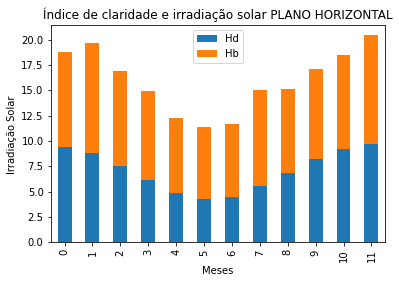

In [56]:
df[["Hd", "Hb", ]].plot(kind="bar", stacked=True)
plt.title("Índice de claridade e irradiação solar PLANO HORIZONTAL")
plt.xlabel("Meses")
plt.ylabel("Irradiação Solar ")

Superficie no hemisferio Sul  

In [92]:
df2=pd.DataFrame({"Mês":df['Mês'],"n*":df['n'],"H":df['H'],"H0":df['HO'],"KT":df['KT'],"Hd/H":df['Hd/H'],"Hd":df['Hd'],"Hb":df['Hb']})
df2

,Mês,n*,H,H0,KT,Hd/H,Hd,Hb
0,1,15,18.792,42.474625,0.442429,0.501132,9.417272,9.374728
1,2,46,19.728,40.063124,0.492423,0.446415,8.806876,10.921124
2,3,74,16.920,35.935060,0.470849,0.447020,7.563581,9.356419
3,4,105,14.904,29.983397,0.497075,0.409361,6.101122,8.802878
4,5,135,12.312,24.793419,0.496583,0.395092,4.864378,7.447622
5,6,166,11.412,22.124684,0.515804,0.375049,4.280057,7.131943
6,7,196,11.664,23.094353,0.505059,0.384968,4.490268,7.173732
7,8,227,15.080,27.359316,0.551183,0.367588,5.543221,9.536779
8,9,258,15.120,33.229561,0.455017,0.451463,6.826123,8.293877
9,10,288,17.136,38.321506,0.447164,0.476679,8.168366,8.967634


In [57]:
Beta_incli=15

In [58]:
df['omega_s*']=np.degrees(np.arccos((-np.tan(np.radians(L_a+Beta_incli))*np.tan(np.radians(df['sigma'])))))


In [59]:
df['Rb']=(np.cos(np.radians(L_a+Beta_incli))*np.cos(np.radians(df['sigma']))*np.sin(np.radians(df['omega_s*']))+(np.pi/180)*df['omega_s*']*np.sin(np.radians(L_a+Beta_incli))*np.sin(np.radians(df['sigma'])))/(np.cos(np.radians(L_a))*np.cos(np.radians(df['sigma']))*np.sin(np.radians(df['omega_s']))+(np.pi/180)*df['omega_s']*np.sin(np.radians(L_a))*np.sin(np.radians(df['sigma'])))


In [60]:
rho=0.2

In [61]:
df['R']=(1-df['Hd/H'])*df['Rb']+df['Hd/H']*((1+np.cos(np.radians(Beta_incli)))/2)+rho*(((1-np.cos(np.radians(Beta_incli)))/2))


In [69]:
df['HT']=df['R']*df['H']


In [70]:
df['HTb']=(1-df['Hd/H'])*df['Rb']*df['H']


In [71]:
df['HTd']=df['Hd/H']*((1+np.cos(np.radians(Beta_incli)))/2)*df['H']


In [72]:
df['HTr']=rho*(((1-np.cos(np.radians(Beta_incli)))/2))*df['H']
df


,Dia,Cor,Mês,n,B,E,Corhora,HS,Omega,sigma,...,Hb,omega_s*,Rb,R,HT,HTb,Htd,Htr,HTd,HTr
0,15,0,1,15,-65.274725,-9.286743,-0.045526,14.454474,36.817114,-21.269474,...,9.374728,93.354664,0.921001,0.955459,17.954994,8.634132,9.256829,0.064032,9.256829,0.064032
1,15,1,2,46,-34.615385,-14.573582,-0.133640,14.366360,35.495405,-13.289156,...,10.921124,92.034712,0.976495,0.982790,19.388482,10.664428,8.656833,0.067222,8.656833,0.067222
2,15,-1,3,74,-6.923077,-9.656338,-0.051686,14.448314,36.724715,-2.818879,...,9.356419,90.424090,1.055476,1.026469,17.367851,9.875478,7.434720,0.057654,7.434720,0.057654
3,15,0,4,105,23.736264,-0.223084,0.105535,14.605535,39.083029,9.414893,...,8.802878,88.571694,1.166157,1.094572,16.313503,10.265543,5.997176,0.050784,5.997176,0.050784
4,15,0,5,135,53.406593,3.754880,0.171835,14.671835,40.077520,18.791918,...,7.447622,87.068002,1.276835,1.164135,14.332836,9.509380,4.781503,0.041952,4.781503,0.041952
5,15,1,6,166,84.065934,-0.240580,0.105244,14.605244,39.078655,23.314410,...,7.131943,86.285525,1.343958,1.211974,13.831051,9.585028,4.207137,0.038885,4.207137,0.038885
6,15,1,7,196,113.736264,-5.615811,0.015656,14.515656,37.734847,21.517336,...,7.173732,86.602283,1.315894,1.191133,13.893380,9.439869,4.413767,0.039744,4.413767,0.039744
7,15,2,8,227,144.395604,-4.094882,0.041005,14.541005,38.115080,13.783564,...,9.536779,87.886607,1.213895,1.132415,17.076816,11.576652,5.448781,0.051384,5.448781,0.051384
8,15,3,9,258,175.054945,5.677410,0.203877,14.703877,40.558152,2.216887,...,8.293877,89.666581,1.097822,1.049375,15.866546,9.105200,6.709825,0.051520,6.709825,0.051520
9,15,3,10,288,204.725275,14.966751,0.358699,14.858699,42.880488,-9.599397,...,8.967634,91.456828,1.003266,0.996995,17.084514,8.996923,8.029201,0.058390,8.029201,0.058390


Text(0, 0.5, 'Irradiação Solar ')

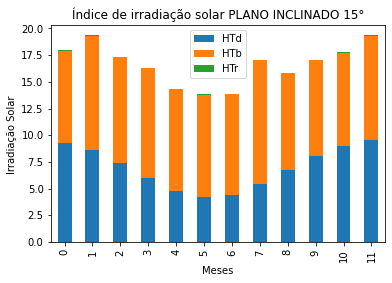

In [89]:
df[["HTd", "HTb", "HTr"]].plot(kind="bar", stacked=True)
plt.title("Índice de irradiação solar PLANO INCLINADO 15°")
plt.xlabel("Meses")
plt.ylabel("Irradiação Solar ")

In [90]:
df1=pd.DataFrame({"Mês":df['Mês'],"Omega_s*":df['omega_s*'],"Rb*":df['Rb'],"R":df['R'],"HT":df['HT'],"HTd":df['HTd'],"HTb":df['HTb'],"HTr":df['Htr']})
df1

,Mês,Omega_s*,Rb*,R,HT,HTd,HTb,HTr
0,1,93.354664,0.921001,0.955459,17.954994,9.256829,8.634132,0.064032
1,2,92.034712,0.976495,0.982790,19.388482,8.656833,10.664428,0.067222
2,3,90.424090,1.055476,1.026469,17.367851,7.434720,9.875478,0.057654
3,4,88.571694,1.166157,1.094572,16.313503,5.997176,10.265543,0.050784
4,5,87.068002,1.276835,1.164135,14.332836,4.781503,9.509380,0.041952
5,6,86.285525,1.343958,1.211974,13.831051,4.207137,9.585028,0.038885
6,7,86.602283,1.315894,1.191133,13.893380,4.413767,9.439869,0.039744
7,8,87.886607,1.213895,1.132415,17.076816,5.448781,11.576652,0.051384
8,9,89.666581,1.097822,1.049375,15.866546,6.709825,9.105200,0.051520
9,10,91.456828,1.003266,0.996995,17.084514,8.029201,8.996923,0.058390
